<a href="https://colab.research.google.com/github/smf-9000/kaggle/blob/main/003_final_my_boost_1st_place.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href="https://www.kaggle.com/ivankontic/003-final-my-boost-1st-place" target="_parent"><img alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>


[Open in Kaggle [Discussion]](https://www.kaggle.com/c/tabular-playground-series-aug-2021/discussion/270051)

[Leaderboard](https://www.kaggle.com/c/tabular-playground-series-aug-2021/leaderboard)

My first 1st place on one kaggle competition 

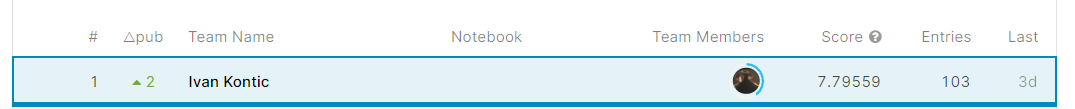

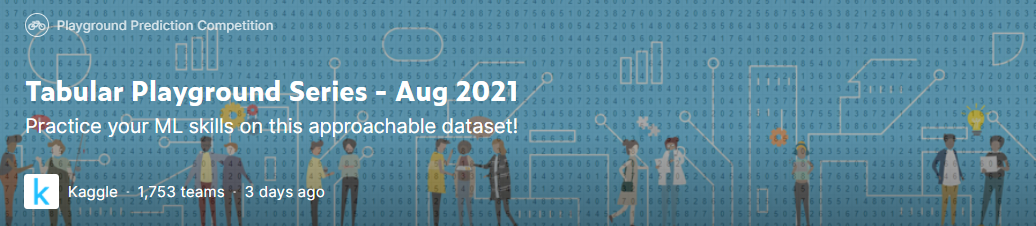

In [ ]:
%config Completer.use_jedi = False

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow, imread

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

import scipy.stats as stats

import lightgbm as lgb
import warnings

import optuna

This is whole code (without optuna part). I boost-ed result several time with this notebook until the final score.

In [ ]:
R_SEED = 37

In [ ]:
submission_ex = pd.read_csv('/kaggle/input/tabular-playground-series-aug-2021/sample_submission.csv')

Thanks to @somayyehgholami [[notebook](https://www.kaggle.com/somayyehgholami/3-tps-aug-21-results-rmse-evaluation)] for initial pseudo-labeling data

In [ ]:
dat_1_df = pd.read_csv('/kaggle/input/for-00351/submission_c_mix_1v6.csv')

Thanks to @alexryzhkov [[notebook](https://www.kaggle.com/alexryzhkov/lightautoml-classifier-regressor-mix)] for initial dataset

In [ ]:
train_df = pd.read_csv('/kaggle/input/for-00352ds/train_df_ivan_0035_1.csv')
test_df = pd.read_csv('/kaggle/input/for-00352ds/test_df_ivan_0035_1.csv')

My Boost

In [ ]:
targets_df = train_df[['loss']].copy()
train_df.drop(['id', 'loss'], axis=1, inplace=True) 
test_df.drop(['id'], axis=1, inplace=True) 
targ_1_df = dat_1_df[['loss']].copy()

In [ ]:
for_me = submission_ex[['id']].copy()

In [ ]:
my_y = targ_1_df['loss'].values

lr = 0.2
for w in range(1):
    # ----------------------------------------------
    params_loss_1 = {
                    'n_estimators': 20000,
                    'learning_rate': 0.005,
                    'min_child_samples': 167,
                    'feature_fraction': 0.3513017494226757,
                    'bagging_fraction': 0.7786913835450154,
                    'bagging_freq': 4,
                    'num_leaves': 178, 
                    }

    lgbm_reg_1 = lgb.LGBMRegressor(
                                **params_loss_1, 
                                objective='rmse',
                                metric='rmse',
                                n_jobs=-1
                                )
    
    lgbm_reg_1.fit(
                test_df,
                my_y)

    p_m = lgbm_reg_1.predict(train_df)

    new_y = targets_df['loss'].values - p_m
    # ----------------------------------------------
    
    params_loss_2 = {
                    'n_estimators': 10000,
                    'learning_rate': 0.001,
                    'min_child_samples': 295,
                    'feature_fraction': 0.2915087392510538,
                    'bagging_fraction': 0.8549961258824171,
                    'bagging_freq': 0,
                    'num_leaves': 105, 
                    }

    lgbm_reg_2 = lgb.LGBMRegressor(
                                **params_loss_2, 
                                objective='rmse',
                                metric='rmse',
                                n_jobs=-1
                                )
    
    lgbm_reg_2.fit(
                train_df, 
                new_y,
                )

    p_a = lgbm_reg_2.predict(test_df)

    my_y = my_y + (p_a * lr)
    # ----------------------------------------------
    
final_loss = my_y

In [ ]:
submission_c = submission_ex[['id']].copy()
submission_c['loss'] = final_loss
submission_c.to_csv('submission_c.csv', index=False)